In [ ]:
import pandas as pd
from google.colab import drive

# connect to Google Drive
drive.mount('/content/drive')

#access to cleaned data set
df_clean2 = pd.read_csv("/content/drive/MyDrive/DataBootcamp Final/df_clean2.csv")

#check
df_clean2.head()
df_clean2.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 96 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BOUGHT_LESSER_QUALITY_PRODUCT         48000 non-null  object 
 1   BRAND                                 48000 non-null  object 
 2   BRANDCONSIDEREDDETAIL_MULTI           48000 non-null  object 
 3   BRANDCONSIDEREDDETAIL_MULTI___1       48000 non-null  object 
 4   BRANDCONSIDERED_MFRWEB_DETAIL_MULTI   48000 non-null  object 
 5   BRANDCONSIDERED_MFRWEB_MULTI          48000 non-null  object 
 6   BRANDCONSIDERED_MULTI                 48000 non-null  object 
 7   BRANDCONSIDERED_MULTI___1             48000 non-null  object 
 8   BRAND_DETAIL                          48000 non-null  object 
 9   CENSUS_DIVISION     

In [77]:
import pandas as pd
import os

# Option 1: local / GitHub path
DATA_PATH = "data/df_clean2.csv"

# Option 2: Google Colab + Drive
COLAB_PATH = "/content/drive/MyDrive/DataBootcamp Final/df_clean2.csv"

if os.path.exists(DATA_PATH):
    df_clean2 = pd.read_csv(DATA_PATH)
else:
    from google.colab import drive
    drive.mount('/content/drive')
    df_clean2 = pd.read_csv(COLAB_PATH)

df_clean2.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,BOUGHT_LESSER_QUALITY_PRODUCT,BRAND,BRANDCONSIDEREDDETAIL_MULTI,BRANDCONSIDEREDDETAIL_MULTI___1,BRANDCONSIDERED_MFRWEB_DETAIL_MULTI,BRANDCONSIDERED_MFRWEB_MULTI,BRANDCONSIDERED_MULTI,BRANDCONSIDERED_MULTI___1,BRAND_DETAIL,CENSUS_DIVISION,...,SHOP_ONLINE,STATE,TIME_AT_ADDRESS,URBAN_VS_RURAL,WATCH_HOME_IMP_SHOWS,WATCH_MOTOR_SPORTS,WEIGHT,YEAR,YEAR_QUARTER,YEAR_ROLLING_4Q
0,Bought Lesser Quality Product Past 3 Months,Vizio,Vizio,Unknown,Did Not Shop Online,Did Not Shop Online,Vizio,Unknown,Vizio,Middle Atlantic,...,False,NY,Over 5 years at this address,Urban/Metro,Unknown,NOT watched,0.714189,2022,2022 Q4,4Q End Jun 2023
1,Unknown,LG,LG,Net10,Did Not Shop Online,Did Not Shop Online,LG,Other Brands,LG,South Atlantic,...,False,WV,Over 1 to 5 years at this address,Urban/Metro,NOT watched,NOT watched,1.674030,2017,2017 Q3,4Q End Jun 2018
2,Unknown,Other Brands,Google,Samsung,Google,Other Brands,Other Brands,Samsung,Google,Pacific,...,True,CA,Over 6 to 12 months at this address,Urban/Metro,NOT watched,NOT watched,1.673450,2018,2018 Q1,4Q End Jun 2018
3,Unknown,Kindle,Kindle,Samsung,Kindle,Kindle,Kindle,Samsung,Kindle,Unknown,...,True,Unknown,Unknown,Unknown,Unknown,Unknown,0.724201,2019,2019 Q3,4Q End Jun 2020
4,Bought Lesser Quality Product Past 3 Months,Acer,Acer,Hewlett Packard Hp,Did Not Shop Any Mfr Web Sites,Did Not Shop Any Mfr Web Sites,Acer,Hewlett Packard Hp,Acer,Pacific,...,True,CA,Over 5 years at this address,Urban/Metro,Unknown,Watched Motor Sports Activities in Past 3 Months,1.455880,2024,2024 Q3,4Q End Jun 2025


# **Introduction**
We are mean to analyse thses data and do prediction on which brand whill consumer choose.
Folowing thses steps:

-choose target columns & Brand distribution

-Create feature X and target Y

-Train/Test split

-Baseline Radom Forest

-Other models

# **Step One**
### Choose target features

In [ ]:
#delet cols with no brand name
df_clean2 = df_clean2[df_clean2["BRAND"].notna()].copy()
print("Number of rows after dropping missing BRAND:", df_clean2.shape[0])
df_clean2["BRAND"].value_counts().head(10)

Number of rows after dropping missing BRAND: 48000


,count
BRAND,
Other Brands,10991
Samsung,6593
Apple,6355
Hewlett Packard Hp,4115
Sony,3606
LG,2345
Dell,2130
Microsoft,1778
Vizio,1415


In [ ]:
for col in df_clean2.columns:
    print(col)

BOUGHT_LESSER_QUALITY_PRODUCT
BRAND
BRANDCONSIDEREDDETAIL_MULTI
BRANDCONSIDEREDDETAIL_MULTI___1
BRANDCONSIDERED_MFRWEB_DETAIL_MULTI
BRANDCONSIDERED_MFRWEB_MULTI
BRANDCONSIDERED_MULTI
BRANDCONSIDERED_MULTI___1
BRAND_DETAIL
CENSUS_DIVISION
CENSUS_REGION
CLUBMEMBERSHIP_MULTI
CLUBMEMBERSHIP_MULTI___1
CLUBMEMBER_AAA
CLUBMEMBER_AMAZON_PRIME
CLUBMEMBER_BJS
CLUBMEMBER_COSTCO
CLUBMEMBER_SAMS
CLUBMEMBER_WALMART_PLUS
DELAYED_HOME_REPAIR
DMA_MARKET
DYNAMIC_PRICE_QUINTILE
EDUCATION
EMPLOYMENT
HH_SIZE
HH_TYPE
HISPANIC
HIST_ONLINE_ACTIVITY_MULTI
HIST_ONLINE_ACTIVITY_MULTI___1
HIST_ONLINE_ACTIVITY_MULTI___2
HIST_ONLINE_ACTIVITY_MULTI___3
HOMEOWN
INCOME
MARITAL_STATUS
MOVING_4Q_TOTAL
MOVING_4Q_TOTAL___1
MOVING_4Q_TOTAL___2
MOVING_4Q_TOTAL___3
MSA_MARKET
NUM_BRAND_SHOPPED
NUM_SHOPPERS
NUM_STORE_SHOPPED
ONLINE_ACTIVITY
ONLINE_ACTIVITY_MULTI
ONLINE_DELIVERY_METHOD
OUTLET
OUTLET_CHANNEL
OUTLET_DETAIL
OUTLET_SHOPPED_DETAIL_MULTI
OUTLET_SHOPPED_DETAIL_MULTI___1
OUTLET_SHOPPED_MULTI
OUTLET_SHOPPED_MULTI___1
O

In [ ]:
feature_cols = [col for col in df_clean2.columns if col != "BRAND"]

In [ ]:
print("\nNumber of feature columns:", len(feature_cols))


Number of feature columns: 95


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:

#incode each brand
df_clean2["BRAND_ENCODED"] = label_encoder.fit_transform(df_clean2["BRAND"])
df_clean2[["BRAND", "BRAND_ENCODED"]].head(10)

,BRAND,BRAND_ENCODED
0,Vizio,21
1,LG,10
2,Other Brands,16
3,Kindle,9
4,Acer,1
5,Apple,3
6,Sony,19
7,Apple,3
8,Motorola,13
9,Other Brands,16


# **Step two**
### Clustering

In [ ]:
#build a data set for clustering
import pandas as pd
import numpy as np
drop_cols = [c for c in ["BRAND", "BRAND_ENCODED"] if c in df_clean2.columns]

X0 = df_clean2.drop(columns=drop_cols).copy()
print("X0 shape:", X0.shape)

X0 shape: (48000, 95)


In [ ]:
#delete features that are not suitable for clusttering
bad_keywords = [
    "RESPONDENT", "ID", "DETAIL_MULTI", "___", "DMA", "MSA", "STATE", "OUTLET_SHOPPED_DETAIL"
]
obj_cols = [c for c in X0.columns if X0[c].dtype == "object"]

def is_bad_col(c):
    uc = c.upper()
    return any(k in uc for k in bad_keywords)

candidate_cat = []
for c in obj_cols:
    if is_bad_col(c):
        continue
    nunq = X0[c].nunique(dropna=True)
    if 2 <= nunq <= 10:
        candidate_cat.append(c)


In [ ]:
print("Candidate categorical cols:", len(candidate_cat))
for c in candidate_cat:
    print(c)

Candidate categorical cols: 46
BOUGHT_LESSER_QUALITY_PRODUCT
CENSUS_DIVISION
CENSUS_REGION
CLUBMEMBERSHIP_MULTI
CLUBMEMBER_AAA
CLUBMEMBER_AMAZON_PRIME
CLUBMEMBER_BJS
CLUBMEMBER_COSTCO
CLUBMEMBER_SAMS
CLUBMEMBER_WALMART_PLUS
DELAYED_HOME_REPAIR
EDUCATION
EMPLOYMENT
HH_SIZE
HH_TYPE
HISPANIC
HOMEOWN
MARITAL_STATUS
NUM_BRAND_SHOPPED
NUM_SHOPPERS
NUM_STORE_SHOPPED
ONLINE_ACTIVITY
ONLINE_DELIVERY_METHOD
OUTLET_TYPE
PURCHASER_AGE
PURCHASER_GENDER
PURCHASER_GENERATION_PEW
QUANTITY
RACE
READ_CRAFT_MAGAZINES
REMODELED_HOME
SHOPPER_AGE_18_TO_24
SHOPPER_AGE_25_TO_29
SHOPPER_AGE_30_TO_34
SHOPPER_AGE_35_TO_44
SHOPPER_AGE_45_TO_54
SHOPPER_AGE_55_TO_64
SHOPPER_AGE_65_PLUS
SHOPPER_AGE_MULTI
SHOPPER_AGE_UNDER_18
SHOPPER_GENDER
SHOP_ONLINE
TIME_AT_ADDRESS
URBAN_VS_RURAL
WATCH_HOME_IMP_SHOWS
WATCH_MOTOR_SPORTS


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [ ]:
num_cols = []
cat_cols = candidate_cat

In [ ]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [ ]:
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

In [ ]:
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols),
], remainder="drop")

In [ ]:
k = 4
cluster_pipe = Pipeline([
    ("prep", preprocess),
    ("kmeans", KMeans(n_clusters=k, random_state=42, n_init="auto"))
])

In [ ]:
cluster_pipe.fit(X0)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BOUGHT_LESSER_QUALITY_PRODUCT',
                                                   'CENSUS_DIVISION',
                                                   'CENSUS_REGION...
                                                   'EDUCATION', 'EMPLOYMENT',
                                                   'HH_SIZE', 'HH_TYPE',
                                                   'HISPANIC', 'HOMEOWN',
                                                   'MARITAL_STATUS',
                                                   'NUM_BRAND_SHOPPED',
                                                   'NUM_SHOPPERS',
                                                   'NUM_STORE_SHOPPED',
                                                   'ONLINE_ACTIVITY',
                                                   'ONLINE_DELIVERY_METHOD',
                                                   'OUTLET_TYPE',
                                                   'PURCHASER_AGE',
                                                   'PURCHASER_GENDER',
                                                   'PURCHASER_GENERATION_PEW',
                                                   'QUANTITY', 'RACE',
                                                   'READ_CRAFT_MAGAZINES', ...])])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [ ]:
df_clean2["cluster"] = cluster_pipe.named_steps["kmeans"].labels_
df_clean2["cluster"].value_counts().sort_index()

,count
cluster,
0,8286
1,22360
2,10589
3,6765


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
X_trans = cluster_pipe.named_steps["prep"].transform(X0)

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
n_sample = 2000
rng = np.random.RandomState(42)

idx = rng.choice(X_trans.shape[0], size=n_sample, replace=False)
X_s = X_trans[idx]

In [ ]:
ks = range(2, 9)
sil_scores = []

In [ ]:
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_s)
    sil_scores.append(silhouette_score(X_s, labels))

print(list(zip(ks, sil_scores)))

[(2, np.float64(0.08385352740014776)), (3, np.float64(0.1261068610017199)), (4, np.float64(0.08747367342351961)), (5, np.float64(0.08545110257104208)), (6, np.float64(0.08303246464261588)), (7, np.float64(0.08924655040823448)), (8, np.float64(0.09728333174541243))]


In [ ]:
from sklearn.cluster import KMeans

#k=3 has the best sil scores
k_final = 3

cluster_pipe_final = Pipeline([
    ("prep", preprocess),
    ("kmeans", KMeans(n_clusters=k_final, random_state=42, n_init="auto"))
])

cluster_pipe_final.fit(X0)

df_clean2["cluster"] = cluster_pipe_final.named_steps["kmeans"].labels_
df_clean2["cluster"].value_counts()

,count
cluster,
1,32836
0,8399
2,6765


In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [ ]:
#transform data
X_trans_final = cluster_pipe_final.named_steps["prep"].transform(X0)

In [ ]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_trans_final)

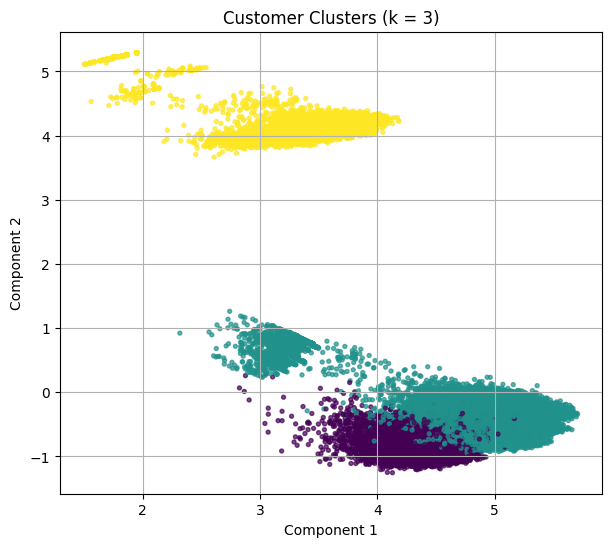

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=df_clean2["cluster"],
    s=8,
    alpha=0.7
)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Customer Clusters (k = 3)")
plt.grid(True)
plt.show()

In [ ]:
#analysis details of each group
import pandas as pd

def topk_share(s, k=3):
    vc = s.value_counts(dropna=False, normalize=True).head(k)
    return ", ".join([f"{idx} ({val:.1%})" for idx, val in vc.items()])

#choose cols we wanna use as features
profile_cols = [
    "INCOME","EDUCATION","EMPLOYMENT","HOMEOWN","HH_SIZE","HH_TYPE",
    "PURCHASER_AGE","PURCHASER_GENDER","PURCHASER_GENERATION_PEW",
    "SHOP_ONLINE","ONLINE_ACTIVITY","OUTLET_TYPE",
    "CLUBMEMBER_COSTCO","CLUBMEMBER_AMAZON_PRIME","CLUBMEMBER_WALMART_PLUS",
    "NUM_BRAND_SHOPPED","NUM_STORE_SHOPPED",
    "URBAN_VS_RURAL","RACE","HISPANIC"
]

In [ ]:
profile_cols = [c for c in profile_cols if c in df_clean2.columns]

In [ ]:
# @title 默认标题文本
profile = (
    df_clean2
    .groupby("cluster")[profile_cols]
    .agg(lambda s: topk_share(s, k=3))
)
profile

,INCOME,EDUCATION,EMPLOYMENT,HOMEOWN,HH_SIZE,HH_TYPE,PURCHASER_AGE,PURCHASER_GENDER,PURCHASER_GENERATION_PEW,SHOP_ONLINE,ONLINE_ACTIVITY,OUTLET_TYPE,CLUBMEMBER_COSTCO,CLUBMEMBER_AMAZON_PRIME,CLUBMEMBER_WALMART_PLUS,NUM_BRAND_SHOPPED,NUM_STORE_SHOPPED,URBAN_VS_RURAL,RACE,HISPANIC
cluster,,,,,,,,,,,,,,,,,,,,
0,"$ 50,000 to $74,999 (18.9%), $ 75,000 to $99,9...","Some college (23.2%), College graduate (22.5%)...","Employed full-time (43.1%), Retired (16.3%), N...",Owned by me or someone else in my household (5...,"2 (31.7%), 1 (19.1%), 3 (18.6%)","Two or more Adults NO Children (44.8%), Two or...","35 to 44 (19.4%), 45 to 54 (18.2%), 55 to 64 (...","Male (54.6%), Female (45.4%)","Millennials (born 1981 - 1996) (31.6%), Gen X ...","True (65.3%), False (34.7%), Unknown (0.0%)","True (68.6%), False (19.8%), Unknown (11.6%)","In a Retail Store (53.7%), Online through the ...","False (72.9%), True (26.8%), Unknown (0.2%)","True (63.6%), False (36.1%), Unknown (0.2%)","False (80.0%), True (19.8%), Unknown (0.2%)","1 Brand Shopped (64.7%), 2 Brands Shopped (23....","1 Store Shopped (64.6%), 2 Stores Shopped (24...","Urban/Metro (86.0%), Rural/Non-Metro (13.2%), ...","White (71.0%), Black (14.5%), Asian or Pacific...","Not of Hispanic, Latino or Spanish Origin (85...."
1,"$ 50,000 to $74,999 (19.5%), $ 35,000 to $49,9...","Some college (23.7%), College graduate (22.9%)...","Employed full-time (40.2%), Retired (16.6%), E...",Owned by me or someone else in my household (6...,"2 (32.4%), 3 (18.1%), 1 (17.0%)","Two or more Adults NO Children (43.9%), Two or...","35 to 44 (18.9%), 45 to 54 (18.7%), 55 to 64 (...","Male (53.1%), Female (46.9%)","Millennials (born 1981 - 1996) (30.4%), Baby B...","True (61.5%), False (38.5%), Unknown (0.0%)","Unknown (99.2%), True (0.6%), False (0.2%)","In a Retail Store (58.7%), Online through the ...","False (70.7%), True (25.3%), Unknown (4.1%)","True (49.8%), False (46.1%), Unknown (4.1%)","Unknown (75.0%), False (22.1%), True (2.9%)","1 Brand Shopped (61.4%), 2 Brands Shopped (25....","1 Store Shopped (63.3%), 2 Stores Shopped (23...","Urban/Metro (83.7%), Rural/Non-Metro (11.9%), ...","White (73.4%), Black (9.9%), Unknown (5.9%)","Not of Hispanic, Latino or Spanish Origin (84...."
2,"$ 50,000 to $74,999 (18.4%), $ 75,000 to $99,9...","Unknown (20.8%), Some college (19.2%), College...","Employed full-time (38.7%), Unknown (20.8%), E...",Owned by me or someone else in my household (4...,"2 (21.3%), Unknown (20.8%), 4 (16.9%)","Two or more Adults WITH Children (32.2%), Two ...",Unknown (100.0%),Unknown (100.0%),Unknown (100.0%),"Unknown (98.0%), True (1.2%), False (0.8%)","Unknown (99.6%), True (0.3%), False (0.1%)","Unknown (98.0%), In a Retail Store (1.2%), Onl...","False (55.2%), True (22.8%), Unknown (22.1%)","True (49.6%), False (28.3%), Unknown (22.1%)","Unknown (63.2%), False (27.0%), True (9.8%)","1 Brand Shopped (64.4%), 2 Brands Shopped (25....","1 Store Shopped (63.5%), 2 Stores Shopped (24...","Urban/Metro (69.5%), Unknown (20.6%), Rural/No...","White (55.4%), Unknown (22.0%), Black (10.8%)","Not of Hispanic, Latino or Spanish Origin (65...."


### **Cluster 0**

**Core characteristics:**

-Income mainly concentrated in the middle-income range ($50k–$75k)

-Predominantly full-time employed, with stable household structures

-Household size typically 2–3 people, often adult households

-Age distribution centered around 35–54, representing core working-age consumers

**Shopping behavior：**

-High likelihood of online shopping (SHOP_ONLINE = True dominates)

-Noticeable online activity, but not extreme

-Shops across both online and physical retail channels

-Tends to shop fewer brands, suggesting moderate brand loyalty

**Interpretation:**

This cluster represents mainstream, stable consumers who are comfortable with digital channels and exhibit relatively predictable purchasing behavior.

### **Cluster 1**
**Core characteristics**

-Similar income and age ranges to Cluster 0

-Comparable household structures and employment patterns

-No strong demographic outliers compared to the overall population

**Shopping behavior**

-Lower observed online activity compared to Cluster 0

-Stronger reliance on physical retail outlets

-Online-related variables often appear less dominant or less consistently populated

-Shopping behavior appears more traditional and store-focused

**Interpretation**

Cluster 1 represents consumers who are demographically similar to Cluster 0 but differ primarily in channel preference, favoring in-store shopping over digital engagement.

### **Cluster 2**
**Core characteristics**

-Demographic variables such as income, age, and gender show a high proportion of “Unknown” or missing values

-Household-related variables remain partially observable, but overall profile is less complete

**Shopping behavior**

-Many behavioral indicators (online activity, channel preference) are missing or weakly observed

-Suggests lower engagement, lower survey response intensity, or limited digital footprint

-Brand and store-related variables provide less consistent signal

**Interpretation**

This cluster does not represent a distinct lifestyle group, but rather a segment of customers with limited observable information, which introduces higher uncertainty in modeling and prediction.

In [ ]:
#check each cluster's y distribution
#check cluster sizes
print("Cluster sizes:")
print(df_clean2["cluster"].value_counts().sort_index())

Cluster sizes:
cluster
0     8399
1    32836
2     6765
Name: count, dtype: int64


In [ ]:
#check brand numbers in each cluster
brand_counts = df_clean2.groupby("cluster")["BRAND"].nunique().sort_index()
print("\n# of unique BRANDS in each cluster:")
print(brand_counts)


# of unique BRANDS in each cluster:
cluster
0    22
1    22
2    22
Name: BRAND, dtype: int64


In [ ]:
#check top brands for each cluster
for cid in sorted(df_clean2["cluster"].unique()):
    print("\n" + "="*60)
    print(f"Cluster {cid} top brands:")
    display(
        df_clean2[df_clean2["cluster"] == cid]["BRAND"]
        .value_counts()
        .head(5)
    )


Cluster 0 top brands:


,count
BRAND,
Other Brands,1708
Apple,1246
Samsung,1239
Sony,654
Hewlett Packard Hp,634



Cluster 1 top brands:


,count
BRAND,
Other Brands,7307
Samsung,4877
Apple,4409
Hewlett Packard Hp,2797
Sony,2279



Cluster 2 top brands:


,count
BRAND,
Other Brands,1976
Apple,700
Hewlett Packard Hp,684
Sony,673
Samsung,477


# **Cluster 0**

In [ ]:
cols = ["NUM_BRAND_SHOPPED", "NUM_STORE_SHOPPED", "ONLINE_ACTIVITY", "QUANTITY"]

for c in cols:
    print("\n", "="*60)
    print(c)
    print(df_clean2[c].value_counts(dropna=False).head(15))


NUM_BRAND_SHOPPED
NUM_BRAND_SHOPPED
1 Brand Shopped     29948
2 Brands Shopped    12128
3 Brands Shopped     4268
4 Brands Shopped     1656
Name: count, dtype: int64

NUM_STORE_SHOPPED
NUM_STORE_SHOPPED
1 Store  Shopped    30507
2 Stores Shopped    11533
3 Stores Shopped     4090
4 Stores Shopped     1870
Name: count, dtype: int64

ONLINE_ACTIVITY
ONLINE_ACTIVITY
Unknown    40286
True        5981
False       1733
Name: count, dtype: int64

QUANTITY
QUANTITY
1          45503
2           2032
3            284
4             96
5             43
Unknown       42
Name: count, dtype: int64


In [ ]:
#transform datatype for calculation
df_tmp = df_clean2.copy()

df_tmp["NUM_BRAND_SHOPPED_num"] = df_tmp["NUM_BRAND_SHOPPED"].str.extract(r"(\d+)").astype(float)
df_tmp["NUM_STORE_SHOPPED_num"] = df_tmp["NUM_STORE_SHOPPED"].str.extract(r"(\d+)").astype(float)

df_tmp["ONLINE_ACTIVITY_num"] = df_tmp["ONLINE_ACTIVITY"].map({
    "True": 1,
    "False": 0
})

df_tmp["QUANTITY_num"] = pd.to_numeric(df_tmp["QUANTITY"], errors="coerce")


In [ ]:
cluster0 = df_tmp[df_tmp["cluster"] == 0]

cluster0[
    ["NUM_BRAND_SHOPPED_num",
     "NUM_STORE_SHOPPED_num",
     "ONLINE_ACTIVITY_num",
     "QUANTITY_num"]
].describe()


,NUM_BRAND_SHOPPED_num,NUM_STORE_SHOPPED_num,ONLINE_ACTIVITY_num,QUANTITY_num
count,8399.000000,8399.000000,7428.000000,8399.000000
mean,1.500417,1.500179,0.775983,1.054292
std,0.778656,0.777432,0.416962,0.269786
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000
max,4.000000,4.000000,1.000000,5.000000


Cluster 0 represents low-involvement, routine buyers

Low brand variety (mostly 1 brand)

Low store variety (mostly 1 store)

Predominantly single-unit purchases

Limited observable online engagement

After establishing a prediction model for cluster0, we found that it was very difficult to predict which brand of products the customers would purchase using the data set. Because from now on, I have decided not to predict the customer's brand choice, but to predict whether the customer will shop online or offline.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
#filter to cluster 0 and drop unknown
df0 = df_clean2.copy()
df0 = df0[df0["cluster"] == 0].copy()
df0 = df0[df0["SHOP_ONLINE"] != "Unknown"].copy()

In [ ]:
#target y
y = df0["SHOP_ONLINE"].map({"True": 1, "False": 0}).astype(int)

In [ ]:
#set features X,seperate num and cat
num_features = [
    "NUM_BRAND_SHOPPED_num",
    "NUM_STORE_SHOPPED_num",
    "QUANTITY_num",
]

In [ ]:
cat_features = [
    "PURCHASER_AGE",
    "PURCHASER_GENDER",
    "URBAN_VS_RURAL",
    "EDUCATION",
    "EMPLOYMENT",
    "HH_SIZE",
]

In [ ]:
all_features = [c for c in (num_features + cat_features) if c in df0.columns]
X = df0[all_features].copy()

In [ ]:
#baseline
baseline_acc = y.value_counts(normalize=True).iloc[0]
baseline_acc

np.float64(0.6528108623153883)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [c for c in num_features if c in X.columns]),
        ("cat", categorical_transformer, [c for c in cat_features if c in X.columns]),
    ]
)

In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=2000))
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PURCHASER_AGE',
                                                   'PURCHASER_GENDER',
                                                   'URBAN_VS_RURAL',
                                                   'EDUCATION', 'EMPLOYMENT',
                                                   'HH_SIZE'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.6523809523809524

In [ ]:
# AUC needs probability for positive class (class=1)
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

print("Cluster 0 baseline accuracy (majority class):", baseline_acc)
print("Cluster 0 Logistic Regression accuracy:", acc)
print("Cluster 0 Logistic Regression AUC:", auc)


Cluster 0 baseline accuracy (majority class): 0.6528108623153883
Cluster 0 Logistic Regression accuracy: 0.6523809523809524
Cluster 0 Logistic Regression AUC: 0.5777561132732183


# **Tree Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# transform True/False into 0/1
y = (df0["SHOP_ONLINE"] == "True").astype(int)

In [ ]:
#drop y in X
X = df0.drop(columns=["SHOP_ONLINE"])

In [ ]:
#seperate numeric and categories cols
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

In [ ]:
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

In [ ]:
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)

In [ ]:
#random forest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf)
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#fit model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['PERIOD', 'PRODUCTID', 'RESPONDENTID', 'WEIGHT', 'YEAR',
       'BRAND_ENCODED', 'cluster'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='...
       'SHOPPER_AGE_DETAIL_MULTI', 'SHOPPER_AGE_DETAIL_MULTI___1',
       'SHOPPER_AGE_MULTI', 'SHOPPER_AGE_MULTI___1', 'SHOPPER_AGE_UNDER_18',
       'SHOPPER_GENDER', 'STATE', 'TIME_AT_ADDRESS', 'URBAN_VS_RURAL',
       'WATCH_HOME_IMP_SHOWS', 'WATCH_MOTOR_SPORTS', 'YEAR_QUARTER',
       'YEAR_ROLLING_4Q'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

In [ ]:
#baseline model
baseline_acc = y_train.value_counts(normalize=True).iloc[0]

In [ ]:
print("Baseline accuracy (majority class):", baseline_acc)
print("RF accuracy:", acc)
print("RF AUC:", auc)

Baseline accuracy (majority class): 0.6527695056581299
RF accuracy: 1.0
RF AUC: 0.9999999999999999


Tree model did much better job at predicting weather customer will buy online or offline compared to LR model and baseline model


In [ ]:
df_clean2.to_csv("/content/drive/MyDrive/DataBootcamp Final/df_clean2_with_cluster.csv", index=False)

# **GradientBoostingClassifier**

In [ ]:
preprocess.fit(X_train, y_train)

Xtr_gb = preprocess.transform(X_train)
Xte_gb = preprocess.transform(X_test)

print(type(Xtr_gb), Xtr_gb.shape)

<class 'numpy.ndarray'> (6716, 20539)


In [ ]:
import scipy.sparse as sp

if sp.issparse(Xtr_gb):
    Xtr_gb = Xtr_gb.toarray()
    Xte_gb = Xte_gb.toarray()

print("Dense shapes:", Xtr_gb.shape, Xte_gb.shape)

Dense shapes: (6716, 20539) (1680, 20539)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(Xtr_gb, y_train)

pred_gb = gb.predict(Xte_gb)
proba_gb = gb.predict_proba(Xte_gb)[:, 1]

print("GB Accuracy:", accuracy_score(y_test, pred_gb))
print("GB AUC:", roc_auc_score(y_test, proba_gb))

GB Accuracy: 1.0
GB AUC: 1.0
